In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Загрузка данных из файла
df = pd.read_csv('housing.csv')

# Вывод первых нескольких строк датасета для ознакомления
print(df.head())

# Вывод описания датасета
print(df.describe())

# Предобработка данных
df = df.dropna()  # Удаление строк с пропущенными значениями

# Информация о датасете
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

Без нормализации:
Accuracy: 0.6439931490090531
Precision: 0.637155297532656
Recall: 0.6513353115727003
F-measure: 0.6441672780630961
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      2065
           1       0.64      0.65      0.64      2022

    accuracy                           0.64      4087
   macro avg       0.64      0.64      0.64      4087
weighted avg       0.64      0.64      0.64      4087

С нормализацией:
Accuracy: 0.8585759725960362
Precision: 0.8606393606393606
Recall: 0.8521266073194856
F-measure: 0.8563618290258449
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2065
           1       0.86      0.85      0.86      2022

    accuracy                           0.86      4087
   macro avg       0.86      0.86      0.86      4087
weighted avg       0.86      0.86      0.86      4087



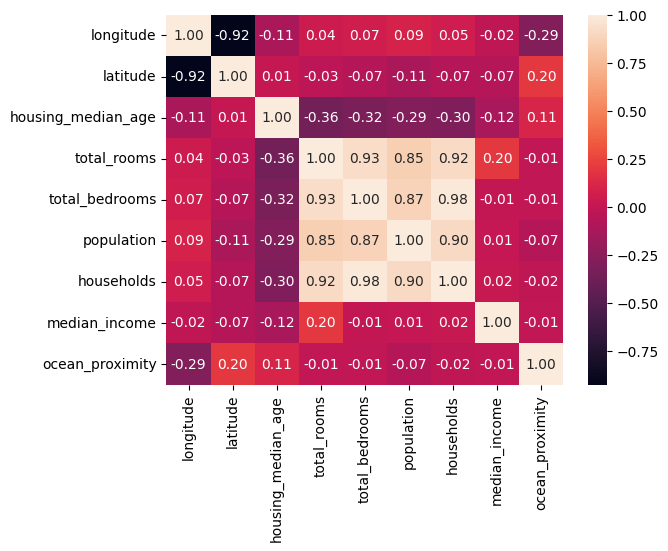

С отфильтрованными признаками:
Accuracy: 0.8585759725960362
Precision: 0.8606393606393606
Recall: 0.8521266073194856
F-measure: 0.8563618290258449
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2065
           1       0.86      0.85      0.86      2022

    accuracy                           0.86      4087
   macro avg       0.86      0.86      0.86      4087
weighted avg       0.86      0.86      0.86      4087



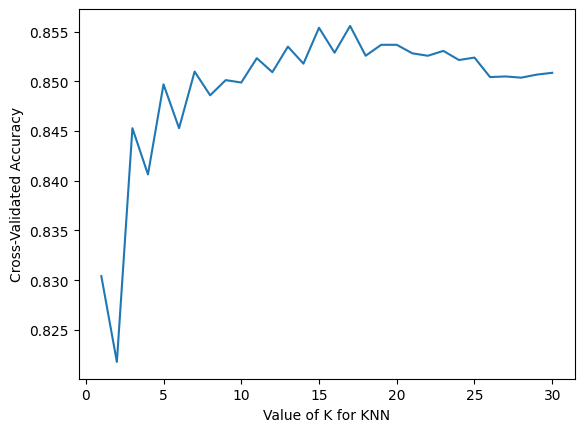

In [5]:

# Определение категориальных признаков
categorical_features = df.select_dtypes(include=['object']).columns

# Кодирование категориальных признаков
label_encoders = {}
for column in categorical_features:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Бинарная классификация: Выбор порогового значения для целевой переменной
df['target'] = (df['median_house_value'] > df['median_house_value'].median()).astype(int)

# Выбор значения гиперпараметра k для kNN
k = 5

# Разделение данных на обучающую и тестовую выборки
X = df.drop(['median_house_value', 'target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Классификация без нормализации
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Метрики классификации без нормализации
print("Без нормализации:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F-measure:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Классификация с нормализацией
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

# Метрики классификации с нормализацией
print("С нормализацией:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Precision:", precision_score(y_test, y_pred_scaled))
print("Recall:", recall_score(y_test, y_pred_scaled))
print("F-measure:", f1_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# Корреляционная матрица и выбор важных признаков
corr_matrix = pd.DataFrame(X_train_scaled, columns=X.columns).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

# Установка порога корреляции
T_corr = 0.5
filtered_features = corr_matrix.columns[(abs(corr_matrix) > T_corr).any()].tolist()

# Классификация с отфильтрованными признаками
X_train_filtered = X_train_scaled[:, X.columns.isin(filtered_features)]
X_test_filtered = X_test_scaled[:, X.columns.isin(filtered_features)]

knn.fit(X_train_filtered, y_train)
y_pred_filtered = knn.predict(X_test_filtered)

# Метрики классификации с отфильтрованными признаками
print("С отфильтрованными признаками:")
print("Accuracy:", accuracy_score(y_test, y_pred_filtered))
print("Precision:", precision_score(y_test, y_pred_filtered))
print("Recall:", recall_score(y_test, y_pred_filtered))
print("F-measure:", f1_score(y_test, y_pred_filtered))
print(classification_report(y_test, y_pred_filtered))

# Перебор значений гиперпараметра k с использованием кросс-валидации
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_filtered, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


Из полученных результатов можно сделать вывод о том, что без нормализации данных значения метрик сильно меньше, чем при нормализованных данных(около 20%). В свою очередь показатели точности с отфильтрованными данными в сравнении с нормализованными не изменились.

Без фильтрации признаков:
Accuracy: 0.7448005872277954
Precision: 0.7466096162689819
Recall: 0.7443363325753743
F-measure: 0.7444269739285102
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1366
           1       0.64      0.65      0.65      1347
           2       0.83      0.75      0.79      1374

    accuracy                           0.74      4087
   macro avg       0.75      0.74      0.74      4087
weighted avg       0.75      0.74      0.74      4087



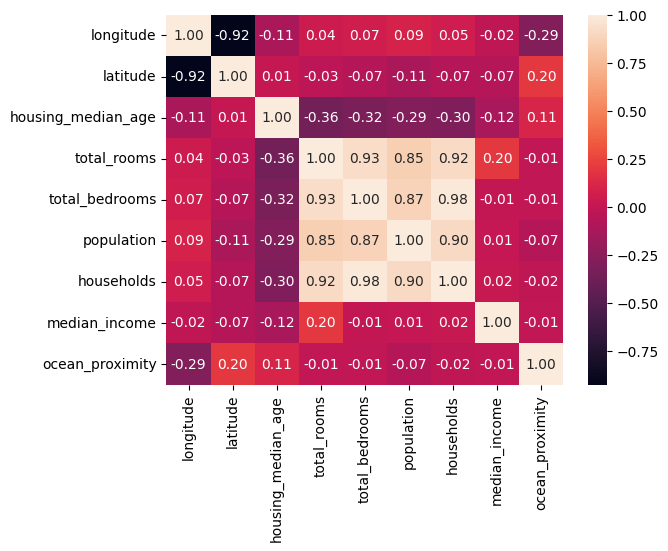

С отфильтрованными признаками:
Accuracy: 0.7448005872277954
Precision: 0.7466096162689819
Recall: 0.7443363325753743
F-measure: 0.7444269739285102
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1366
           1       0.64      0.65      0.65      1347
           2       0.83      0.75      0.79      1374

    accuracy                           0.74      4087
   macro avg       0.75      0.74      0.74      4087
weighted avg       0.75      0.74      0.74      4087



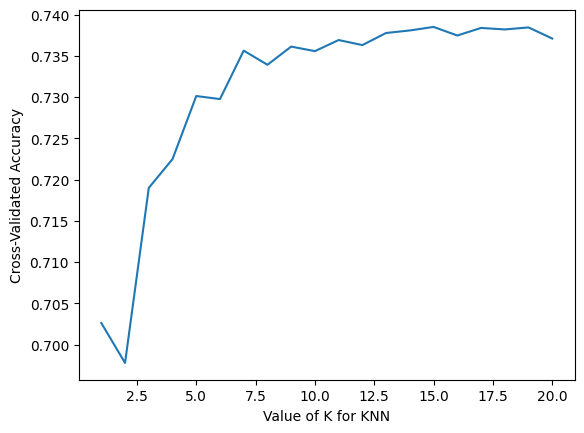

In [10]:

# Кодирование категориальных признаков
label_encoder = LabelEncoder()
df['ocean_proximity'] = label_encoder.fit_transform(df['ocean_proximity'])

# Определение целевой переменной
df['target'] = pd.qcut(df['median_house_value'], q=3, labels=False)  # Три класса

# Разделение данных на признаки и целевую переменную
X = df.drop(['median_house_value', 'target'], axis=1)
y = df['target']

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Выбор значения гиперпараметра k для kNN
k = 5

# Классификация
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Метрики классификации без фильтрации признаков
print("Без фильтрации признаков:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F-measure:", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

# Корреляционная матрица и выбор важных признаков
corr_matrix = pd.DataFrame(X_train, columns=X.columns).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

# Установка порога корреляции
T_corr = 0.5
filtered_features = corr_matrix.columns[(abs(corr_matrix) > T_corr).any()].tolist()

# Классификация с отфильтрованными признаками
X_train_filtered = X_train[:, X.columns.isin(filtered_features)]
X_test_filtered = X_test[:, X.columns.isin(filtered_features)]

knn.fit(X_train_filtered, y_train)
y_pred_filtered = knn.predict(X_test_filtered)

# Метрики классификации с отфильтрованными признаками
print("С отфильтрованными признаками:")
print("Accuracy:", accuracy_score(y_test, y_pred_filtered))
print("Precision:", precision_score(y_test, y_pred_filtered, average='macro'))
print("Recall:", recall_score(y_test, y_pred_filtered, average='macro'))
print("F-measure:", f1_score(y_test, y_pred_filtered, average='macro'))
print(classification_report(y_test, y_pred_filtered))

# Перебор значений гиперпараметра k с использованием кросс-валидации (с уменьшенным диапазоном и 5-кратной кросс-валидацией)
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_filtered, y_train, cv=5, scoring='accuracy')  # 5-кратная кросс-валидация
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


Ощутимой разницы между результатами вычисления метрик не было обнаружено.